In [1]:
!pip install transformers

In [4]:
def good_update_interval(total_iters, num_desired_updates):
    '''
    This function will try to pick an intelligent progress update interval 
    based on the magnitude of the total iterations.

    Parameters:
      `total_iters` - The number of iterations in the for-loop.
      `num_desired_updates` - How many times we want to see an update over the 
                              course of the for-loop.
    '''
    # Divide the total iterations by the desired number of updates. Most likely
    # this will be some ugly number.
    exact_interval = total_iters / num_desired_updates

    # The `round` function has the ability to round down a number to, e.g., the
    # nearest thousandth: round(exact_interval, -3)
    #
    # To determine the magnitude to round to, find the magnitude of the total,
    # and then go one magnitude below that.

    # Get the order of magnitude of the total.
    order_of_mag = len(str(total_iters)) - 1

    # Our update interval should be rounded to an order of magnitude smaller. 
    round_mag = order_of_mag - 1

    # Round down and cast to an int.
    update_interval = int(round(exact_interval, -round_mag))

    # Don't allow the interval to be zero!
    if update_interval == 0:
        update_interval = 1

    return update_interval

In [5]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [6]:
import pandas as pd

In [7]:
tweet = pd.read_csv('TweetData.csv')
#tweet.drop(['Unnamed: 0'], axis=1, inplace = True)
tweet.head()

,Date,User,twee
0,1/29/2022,bunty_1998,fideliscrypto fidelis inflation holding fdls b...
1,1/29/2022,Loan_Tube,89176 cases in the uk in the last 24 hours lo...
2,1/29/2022,CoinOriental,oriental coin is a hedge against inflation the...
3,1/29/2022,cherylcasone,coming up on with but not mentioning footbal...
4,1/29/2022,CubHawkfan4life,as prices are increasing on everything those m...


In [8]:
tweet1 = pd.read_csv('TweetData1.csv')
#tweet.drop(['Unnamed: 0'], axis=1, inplace = True)
tweet1.head()

,Date,User,twee
0,12/16/2013,Baydu,at the rate things are going now he will becom...
1,12/16/2013,savoythegreat,12 for a meal at subwayi should have went to f...
2,12/16/2013,VendorAid,ohno lipton tea bags look about 50 full compar...
3,12/16/2013,Rosscamm,a ups driver just asked me if the fed tapered ...
4,12/16/2013,ACFSLLC,the estate tax exemption for 2014 has been adj...


In [9]:
frames = [tweet1, tweet]
tweets = pd.concat(frames)
tweets

,Date,User,twee
0,12/16/2013,Baydu,at the rate things are going now he will becom...
1,12/16/2013,savoythegreat,12 for a meal at subwayi should have went to f...
2,12/16/2013,VendorAid,ohno lipton tea bags look about 50 full compar...
3,12/16/2013,Rosscamm,a ups driver just asked me if the fed tapered ...
4,12/16/2013,ACFSLLC,the estate tax exemption for 2014 has been adj...
...,...,...,...
99995,11/10/2022,AMByteNet,average income in 2020 was 46496 and now in 20...
99996,11/10/2022,LonskiJohn,one month is not a trend octobers unexpected...
99997,11/10/2022,Ronniemarkets,us cpi inflation came in at 77 very slightly b...
99998,11/10/2022,0rangeCru5h,dxy uup dollar down 7 in 2 months is that goo...


In [10]:
headlines = list(tweets['twee'])

In [11]:
headlines

['at the rate things are going now he will become min diesel fuelexpensive inflation',
 '12 for a meal at subwayi should have went to firehouse for quality then inflation',
 'ohno lipton tea bags look about 50 full compared to my old box lipton cutting back like all other companies invisible inflation',
 'a ups driver just asked me if the fed tapered today bubbles federalreserve taper',
 'the estate tax exemption for 2014 has been adjusted for inflation it increases from the 2013 amount of 5250000 to 5340000 inflation',
 'eh the silverstandard impacted inflation because it made it easier for farmers to pay off debt populism',
 'krugman like bernanke hates grandmas and likes stealing their lifelong savings through inflation',
 '3 trebles for 6 quid what the hell is this bloody mimos inflation ',
 'the fed turned 100 yrs old today monetarypolicy',
 'the train tickets from frosty the snowman would cost 2013354 today inflation',
 'draghi says eurozone might experience long period of low in

In [12]:
len(headlines)

200000

# Smart Batching

## Load Tokenizer

In [1]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
#tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone', do_lower_case=True)

Loading BERT tokenizer...


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

C:\Users\g-lim\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:123: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\g-lim\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Downloading:   0%|          | 0.00/533 [00:00<?, ?B/s]

## Tokenize Without Padding

In [13]:
max_len = 400

In [14]:
full_input_ids = []
labels = []

# Tokenize all tweets
print('Tokenizing {:,} tweets...'.format(len(headlines)))

# Choose an interval on which to print progress updates.
update_interval = good_update_interval(total_iters=len(headlines), num_desired_updates=10)

# For each training example...
for text in headlines:
    
    # Report progress.
    if ((len(full_input_ids) % update_interval) == 0):
        print('  Tokenized {:,} tweets.'.format(len(full_input_ids)))

    # Tokenize the sentence.
    input_ids = tokenizer.encode(text=text,           # Movie review text
                                 add_special_tokens=True, # Do add specials.
                                 max_length=max_len,  # Do truncate to `max_len`
                                 truncation=True,     # Do truncate!
                                 padding=False)       # Don't pad!
                                 
    # Add the tokenized result to our list.
    full_input_ids.append(input_ids)
    
print('DONE.')
print('{:>10,} samples'.format(len(full_input_ids)))

Tokenizing 200,000 tweets...
  Tokenized 0 tweets.
  Tokenized 20,000 tweets.
  Tokenized 40,000 tweets.
  Tokenized 60,000 tweets.
  Tokenized 80,000 tweets.
  Tokenized 100,000 tweets.
  Tokenized 120,000 tweets.
  Tokenized 140,000 tweets.
  Tokenized 160,000 tweets.
  Tokenized 180,000 tweets.
DONE.
   200,000 samples


## Sort by length

In [24]:
# Get all of the lengths.
unsorted_lengths = [len(x) for x in full_input_ids]

In [28]:
%pip install seaborn

  Using cached seaborn-0.12.1-py3-none-any.whl (288 kB)
Note: you may need to restart the kernel to use updated packages.


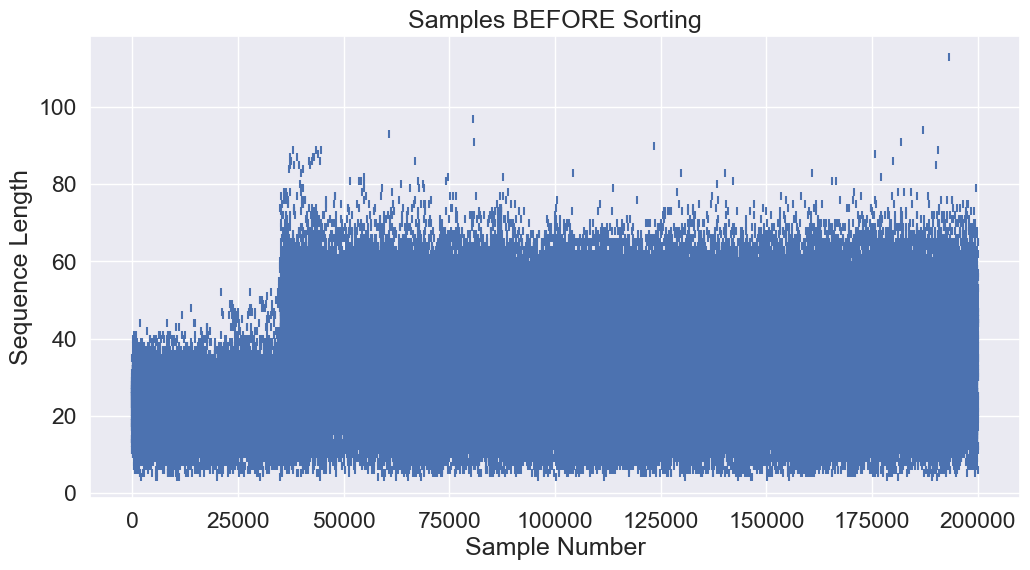

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

plt.scatter(range(0, len(unsorted_lengths)), unsorted_lengths, marker="|")

plt.xlabel('Sample Number')
plt.ylabel('Sequence Length')
plt.title('Samples BEFORE Sorting')

plt.show()

In [15]:
# Sort the tweet data by the length of the input sequence.
tweet_samples = sorted(zip(full_input_ids), key=lambda x: len(x[0]))

In [16]:
tweet_samples[11]

([3, 637, 2122, 4],)

In [17]:
print('Shortest tweet:', len(tweet_samples[0][0]))
print('Longest tweet:', len(tweet_samples[-1][0]))

Shortest tweet: 4
Longest tweet: 94


In [18]:
# Get the new list of lengths after sorting.
sorted_lengths = [len(s[0]) for s in tweet_samples]

In [19]:
# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

plt.plot(range(0, len(sorted_lengths)), sorted_lengths)

plt.xlabel('Tweet Number')
plt.ylabel('Sequence Length')
plt.title('Tweets after Sorting')

plt.show()

NameError: name 'sns' is not defined

## Random Batch Selection

In [20]:
# Choose our batch size.
batch_size = 16

In [21]:
import random

# List of batches that we'll construct.
batch_ordered_sentences = []

print('Creating training batches of size {:}'.format(batch_size))

# Loop over all of the input samples...    
while len(tweet_samples) > 0:
    
    # Report progress.
    if ((len(batch_ordered_sentences) % 500) == 0):
        print('  Selected {:,} batches.'.format(len(batch_ordered_sentences)))

    # `to_take` is our actual batch size. It will be `batch_size` until 
    # we get to the last batch, which may be smaller. 
    to_take = min(batch_size, len(tweet_samples))

    # Pick a random index in the list of remaining samples to start
    # our batch at.
    select = random.randint(0, len(tweet_samples) - to_take)

    # Select a contiguous batch of samples starting at `select`.
    batch = tweet_samples[select:(select + to_take)]

    # Each sample is a tuple--split them apart to create a separate list of 
    # sequences and a list of labels for this batch.
    batch_ordered_sentences.append([s[0] for s in batch])

    # Remove these samples from the list.
    del tweet_samples[select:select + to_take]

print('\n  DONE - {:,} batches.'.format(len(batch_ordered_sentences)))

Creating training batches of size 16
  Selected 0 batches.
  Selected 500 batches.
  Selected 1,000 batches.
  Selected 1,500 batches.
  Selected 2,000 batches.
  Selected 2,500 batches.
  Selected 3,000 batches.
  Selected 3,500 batches.
  Selected 4,000 batches.
  Selected 4,500 batches.
  Selected 5,000 batches.
  Selected 5,500 batches.
  Selected 6,000 batches.
  Selected 6,500 batches.
  Selected 7,000 batches.
  Selected 7,500 batches.
  Selected 8,000 batches.
  Selected 8,500 batches.
  Selected 9,000 batches.
  Selected 9,500 batches.
  Selected 10,000 batches.
  Selected 10,500 batches.
  Selected 11,000 batches.
  Selected 11,500 batches.
  Selected 12,000 batches.

  DONE - 12,500 batches.


## Add Padding

In [22]:
import torch

py_inputs = []
py_attn_masks = []
#py_labels = []

# For each batch...
for batch_inputs in batch_ordered_sentences:

    # New version of the batch, this time with padded sequences and now with
    # attention masks defined.
    batch_padded_inputs = []
    batch_attn_masks = []
    
    # First, find the longest sample in the batch. 
    # Note that the sequences do currently include the special tokens!
    max_size = max([len(sen) for sen in batch_inputs])

    #print('Max size:', max_size)

    # For each input in this batch...
    for sen in batch_inputs:
        
        # How many pad tokens do we need to add?
        num_pads = max_size - len(sen)

        # Add `num_pads` padding tokens to the end of the sequence.
        padded_input = sen + [tokenizer.pad_token_id]*num_pads

        # Define the attention mask--it's just a `1` for every real token
        # and a `0` for every padding token.
        attn_mask = [1] * len(sen) + [0] * num_pads

        # Add the padded results to the batch.
        batch_padded_inputs.append(padded_input)
        batch_attn_masks.append(attn_mask)

    # Our batch has been padded, so we need to save this updated batch.
    # We also need the inputs to be PyTorch tensors, so we'll do that here.
    py_inputs.append(torch.tensor(batch_padded_inputs))
    py_attn_masks.append(torch.tensor(batch_attn_masks))
    #py_labels.append(torch.tensor(batch_labels))


# Fine-Tune BERT

## Load Pre-Trained Model

In [28]:
labels = {0:'neutral', 1:'positive',2:'negative'}
num_labels= len(labels)

In [29]:
# from transformers import AutoConfig

# # Load the Config object, with an output configured for classification.
# config = AutoConfig.from_pretrained(pretrained_model_name_or_path='bert-base-uncased',
#                                     num_labels=3)

# print('Config type:', str(type(config)), '\n')

from transformers import BertTokenizer, BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone', num_labels=num_labels)

In [44]:
# from transformers import AutoModelForSequenceClassification

# # Load the pre-trained model for classification, passing in the `config` from
# # above.
# model = AutoModelForSequenceClassification.from_pretrained(
#     pretrained_model_name_or_path='bert-base-uncased',
#     config=config)

# print('\nModel type:', str(type(model)))

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at


Model type: <class 'transformers.models.bert.modeling_bert.BertForSequenceClassification'>


In [30]:
import torch
from torch import cuda

device = 'cuda' if cuda.is_available() else 'cpu'

model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30873, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [31]:
import torch.nn.functional as F

In [44]:
print('Getting sentiment labels for {:,} tweet data...'.format(len(headlines)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
score, label = [], []

# Choose an interval on which to print progress updates.
update_interval = good_update_interval(total_iters=len(py_inputs), num_desired_updates=10)

# Measure elapsed time.
t0 = time.time()

# Put model in evaluation mode
model.eval()

# For each batch of training data...
for step in range(0, len(py_inputs)):

    # Progress update every 100 batches.
    if step % update_interval == 0 and not step == 0:
        # Calculate elapsed time in minutes.
        elapsed = format_time(time.time() - t0)
        
        # Calculate the time remaining based on our progress.
        steps_per_sec = (time.time() - t0) / step
        remaining_sec = steps_per_sec * (len(py_inputs) - step)
        remaining = format_time(remaining_sec)

        # Report progress.
        print('  Batch {:>7,}  of  {:>7,}.    Elapsed: {:}.  Remaining: {:}'.format(step, len(py_inputs), elapsed, remaining))

    # Copy the batch to the GPU.
    b_input_ids = py_inputs[step].to(device)
    b_input_mask = py_attn_masks[step].to(device)
    #b_labels = py_labels[step].to(device)
  
    # Telling the model not to compute or store gradients, saving memory and 
    # speeding up prediction
    with torch.no_grad():
        # Forward pass, calculate logit predictions
        outputs = model(b_input_ids, token_type_ids=None, 
                        attention_mask=b_input_mask)
        
    logits = outputs[0]

    # Move logits and labels to CPU
    #logits = logits.detach().cpu().numpy()
    #label_ids = labels[torch.argmax(outputs).item()]
  
    # Store predictions and true labels
    #score.append(logits)
    #label.append(label_ids)
    score.append(logits)
    #label.append(label)

print('    DONE.')

Getting sentiment labels for 200,000 tweet data...
  Batch   1,000  of   12,500.    Elapsed: 0:20:51.  Remaining: 3:59:44
  Batch   2,000  of   12,500.    Elapsed: 0:42:11.  Remaining: 3:41:27
  Batch   3,000  of   12,500.    Elapsed: 1:12:43.  Remaining: 3:50:16
  Batch   4,000  of   12,500.    Elapsed: 1:41:09.  Remaining: 3:34:56
  Batch   5,000  of   12,500.    Elapsed: 2:00:00.  Remaining: 2:59:59
  Batch   6,000  of   12,500.    Elapsed: 2:18:12.  Remaining: 2:29:43
  Batch   7,000  of   12,500.    Elapsed: 2:36:37.  Remaining: 2:03:03
  Batch   8,000  of   12,500.    Elapsed: 2:54:32.  Remaining: 1:38:11
  Batch   9,000  of   12,500.    Elapsed: 3:12:20.  Remaining: 1:14:48
  Batch  10,000  of   12,500.    Elapsed: 3:30:52.  Remaining: 0:52:43
  Batch  11,000  of   12,500.    Elapsed: 3:48:22.  Remaining: 0:31:08
  Batch  12,000  of   12,500.    Elapsed: 4:05:51.  Remaining: 0:10:15
    DONE.


In [47]:
score

[tensor([[ 3.0779, -5.8250,  1.3452],
         [ 6.7086, -7.0596, -5.0275],
         [-4.0628,  8.2391, -6.4243],
         [ 7.1072, -5.5159, -3.2222],
         [ 5.4242, -6.5006, -0.8570],
         [ 4.4586, -6.8160,  1.2807],
         [-0.4256, -2.7376,  2.6832],
         [ 6.7086, -7.0596, -5.0275],
         [ 3.0403, -3.8238,  0.1833],
         [ 6.6499, -6.1160, -2.4672],
         [ 3.4384, -4.9865, -1.6110],
         [ 5.0971, -7.6082, -0.9612],
         [ 4.3016, -5.8925, -0.5303],
         [ 3.3558, -5.2319,  1.1830],
         [ 6.7086, -7.0596, -5.0275],
         [-5.3181, 10.0456, -7.9326]]),
 tensor([[-1.9967, -4.4357, 10.0460],
         [ 6.3664, -6.8216, -2.6014],
         [ 6.5822, -6.9722, -3.2045],
         [ 3.1052, -1.6022, -3.7541],
         [ 6.1697, -6.2206, -3.1252],
         [ 5.3453, -5.8232, -1.5295],
         [ 2.6445, -6.6705,  1.9403],
         [ 3.9201, -7.8695,  1.8054],
         [ 1.0593, -1.3731, -4.6363],
         [ 6.7446, -8.8471, -1.2050],
         [

In [56]:
# Combine the results across the batches.
score = np.concatenate(score, axis=0)

In [60]:
# Choose the label with the highest score as our prediction.
sentiment = np.argmax(score, axis=1).flatten()

In [61]:
sentiment

array([1, 1, 2, ..., 2, 1, 1], dtype=int64)

In [64]:
unique, counts = np.unique(sentiment, return_counts=True)

In [65]:
dict(zip(unique, counts))

{0: 17559, 1: 37834, 2: 144607}